# 1.Anomaly detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

可视化数据集1

In [2]:
mat = loadmat('./data/ex8data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [3]:
mat['X'], mat['Xval'], mat['yval']

(array([[13.04681517, 14.74115241],
        [13.40852019, 13.7632696 ],
        [14.19591481, 15.85318113],
        [14.91470077, 16.17425987],
        [13.57669961, 14.04284944],
        [13.92240251, 13.40646894],
        [12.82213164, 14.22318782],
        [15.67636615, 15.89169137],
        [16.16287532, 16.20299807],
        [12.66645095, 14.89908374],
        [13.98454962, 12.95800822],
        [14.06146043, 14.54908874],
        [13.38988671, 15.56202142],
        [13.39350475, 15.62698794],
        [13.97900926, 13.28061494],
        [14.16791259, 14.46583829],
        [13.96176145, 14.75182421],
        [14.45899735, 15.07018563],
        [14.58476372, 15.82743424],
        [12.07427074, 13.0671109 ],
        [13.5491294 , 15.53827677],
        [13.98625042, 14.78776304],
        [14.96991942, 16.51830493],
        [14.25576597, 15.29427277],
        [15.33425   , 16.12469989],
        [15.6350487 , 16.49094477],
        [13.62081292, 15.45947525],
        [14.81548485, 15.339

In [4]:
X, Xval, yval = mat['X'], mat['Xval'], mat['yval']
X.shape, Xval.shape, yval.shape

((307, 2), (307, 2), (307, 1))

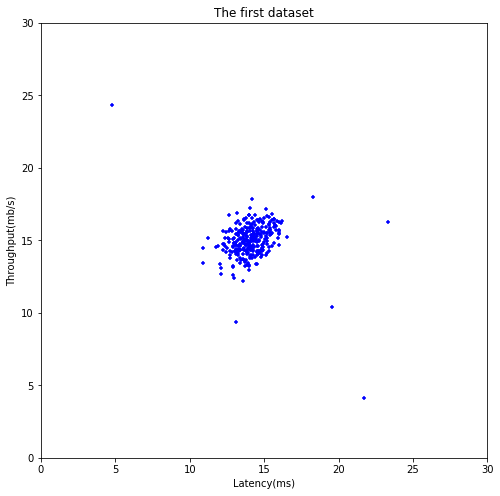

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], s=10, marker='+', c='b')
ax.set_xticks(np.linspace(0, 30, 7))
ax.set_yticks(np.linspace(0, 30, 7))
ax.set_xlabel('Latency(ms)')
ax.set_ylabel('Throughput(mb/s)')
ax.set_title('The first dataset')
plt.show()

## Gaussian distribution  
For each feature i=1...n,you need to find parameters$u_i$ and ${\sigma}^2$that fit the data in the i-th dimension$\left\{ {x_i}^{\left( 1 \right)},...,{x_i}^{\left( m \right)} \right\}$
  
  The Gaussian distribution is given by  
$$
p(x;u;{\sigma}^2)={\frac{1}{\sqrt{2\pi{\sigma}^2}}}e^{-\frac{\left( {x-u}^2 \right)}{2{\sigma}^2}}
$$    


In [6]:
U = np.mean(X, axis=0)  # U.shape应为(2, )
U, U.shape

(array([14.11222578, 14.99771051]), (2,))

In [7]:
Sigma_square = np.mean((X - U) ** 2, axis=0)
Sigma_square, Sigma_square.shape

(array([1.83263141, 1.70974533]), (2,))

以函数形式封装一下

In [8]:
def estimateGaussian(X):
    U = np.mean(X, axis=0)
    Sigma_square = np.mean((X - U) ** 2, axis=0)
    return U, Sigma_square

In [9]:
def calProb(X, U, S):
    term = (1 / np.sqrt(2 * np.pi * S)) * np.exp(-((X - U) ** 2) / (2 * S))
    # numpy中有对指定维度求元素乘积的方法吗?
    # 可以自定义
    def mymul(a):
        ans = 1
        for i in range(a.size):
            ans *= a[i]
        return ans
    return np.apply_along_axis(mymul, 1, term)

In [10]:
Prob = calProb(X, U, Sigma_square)
Prob

array([6.47082850e-02, 5.03041697e-02, 7.24503459e-02, 5.03157451e-02,
       6.36849657e-02, 4.24583228e-02, 4.79094514e-02, 3.65111476e-02,
       1.86657981e-02, 5.06882606e-02, 2.65150875e-02, 8.47130185e-02,
       7.10473222e-02, 6.95531914e-02, 3.77788348e-02, 8.27029589e-02,
       8.77921221e-02, 8.68763043e-02, 6.91708642e-02, 9.73470177e-03,
       7.57066464e-02, 8.83768074e-02, 3.74100482e-02, 8.71375788e-02,
       4.12630362e-02, 2.48800242e-02, 7.90901300e-02, 7.59228904e-02,
       8.08257085e-02, 7.66395995e-02, 5.01173495e-02, 8.80498288e-02,
       6.17880844e-02, 5.96234469e-02, 2.09024063e-02, 4.57936991e-02,
       3.53418180e-02, 8.21286529e-02, 7.24325306e-02, 8.49788605e-02,
       6.41878342e-02, 6.64784465e-02, 8.37566936e-02, 8.57620375e-02,
       6.94628046e-02, 5.88478150e-02, 3.30652955e-02, 7.03092647e-02,
       7.77494497e-02, 3.59889069e-02, 7.34972804e-02, 7.56209579e-02,
       8.54690789e-02, 8.97861557e-02, 7.58702322e-02, 8.44453776e-02,
      

In [11]:
Prob.shape

(307,)

In [12]:
xlist = np.arange(0, 30, 0.01).reshape(3000, 1)
ylist = np.arange(0, 30, 0.01).reshape(3000, 1)
merged_xy = np.concatenate((xlist, ylist), axis=1) # numpy数组存储方便计算
Prob = calProb(merged_xy, U, Sigma_square)
Prob.shape

(3000,)

画等高线的话计算高度的方式好像之前的函数不能用了

In [13]:
def f(x, y, U, S):
    
    return (1 / np.sqrt(2 * np.pi * S[0])) * np.exp(-((x - U[0]) ** 2) / (2 * S[0])) * (1 / np.sqrt(2 * np.pi * S[1])) * np.exp(-((y - U[1]) ** 2) / (2 * S[1]))
    

In [14]:
x, y = np.meshgrid(xlist, ylist)
z = f(x, y, U, Sigma_square)


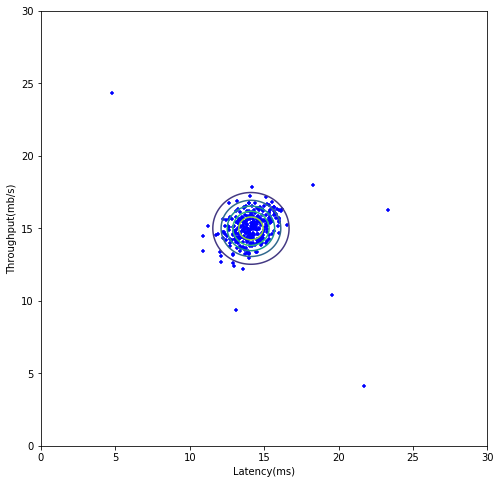

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], s=10, marker='+', c='b')
ax.contour(x, y, z)
ax.set_xticks(np.linspace(0, 30, 7))
ax.set_yticks(np.linspace(0, 30, 7))
ax.set_xlabel('Latency(ms)')
ax.set_ylabel('Throughput(mb/s)')
plt.show()

看起来应该是这样的吗

## Selecting the threshold $\epsilon$  
使用交叉验证集进行

In [16]:
Xval.shape, yval.shape

((307, 2), (307, 1))

In [17]:
a = calProb(Xval, U, Sigma_square)
a.min(), a.max()

(4.5132509303098265e-36, 0.08990852779269491)

In [18]:
U, S = estimateGaussian(X)
U.shape, S.shape

((2,), (2,))

In [19]:
def selectThreshold(Xval, yval, U, S):
    p_cv = calProb(Xval, U, S)   # (307, )
    yval = yval.ravel()
    best_f1 = -np.inf
    best_epsilon = 0.0
    
    step = (p_cv.max() - p_cv.min()) / 1000
    
    for e in np.arange(p_cv.min(), p_cv.max(), step):
        # 根据epsilon将p_cv标签化，即进行预测
        # predict = np.where(p_cv >= e, 1, 0)  # 写反了，1代表异常。导致错误结果
        predict = np.where(p_cv >= e, 0, 1)
        # 根据precision,recall计算F1-score
        tp_num = np.where((predict == 1) & (yval == 1))[0].shape[0]
        fp_num = np.where((predict == 1) & (yval == 0))[0].shape[0]
        fn_num = np.where((predict == 0) & (yval == 1))[0].shape[0]
        # print(tp_num, fp_num, fn_num)
        # 很奇怪，这里必须要考虑0做除数的情况。其他人未写明咋还能运行
        
        if (tp_num or fp_num) and  (tp_num or fn_num):
            prec = tp_num / (tp_num + fp_num)
            recall = tp_num / (tp_num + fn_num)
            F1 = (2 * prec * recall) / (prec + recall)
            if F1 > best_f1:
                best_f1 = F1
                best_epsilon = e
    return (best_epsilon, best_f1)

In [20]:
epsilon, f1 = selectThreshold(Xval, yval, U, S)
epsilon, f1

(8.990852779269492e-05, 0.8750000000000001)

使用得到的$\epsilon$可视化数据集

In [21]:
p = calProb(X, U, S)
p.shape

(307,)

In [22]:
anomaly_points = np.where(p < epsilon)
anomaly_points   # 指向的是索引

(array([300, 301, 303, 304, 305, 306], dtype=int64),)

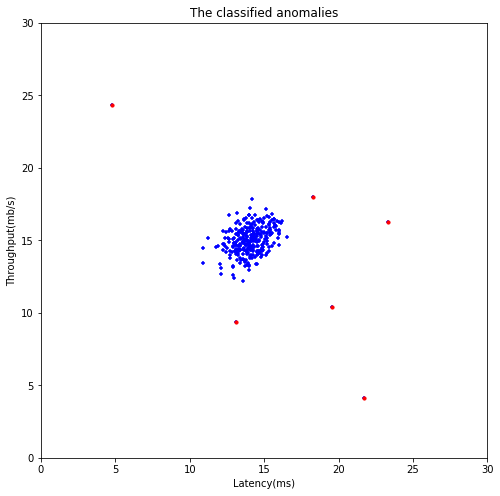

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], s=10, marker='+', c='b')
ax.scatter(X[anomaly_points][:, 0], X[anomaly_points][:, 1], s=10, marker='o', c='r')
ax.set_xticks(np.linspace(0, 30, 7))
ax.set_yticks(np.linspace(0, 30, 7))
ax.set_xlabel('Latency(ms)')
ax.set_ylabel('Throughput(mb/s)')
ax.set_title('The classified anomalies')
plt.show()

## High dimensional dataset

In [24]:
mat = loadmat('./data/ex8data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [25]:
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']
X.shape, Xval.shape, yval.shape

((1000, 11), (100, 11), (100, 1))

In [26]:
U, S = estimateGaussian(X)
U, S

(array([  4.93940034,  -9.63726819,  13.81470749, -10.4644888 ,
         -7.95622922,  10.19950372,  -6.01940755,   7.96982896,
         -6.2531819 ,   2.32451289,   8.47372252]),
 array([60.97489373, 53.20572186, 58.51546272, 84.20403725, 65.26859177,
        89.57487757, 55.63349911, 87.16233783, 29.62926829, 70.7852052 ,
        50.50356719]))

In [27]:
epsilon, f1 = selectThreshold(Xval, yval, U, S)
epsilon, f1

(1.377228890761357e-18, 0.6153846153846154)

In [28]:
p = calProb(X, U, S)
anomaly_points = np.where(p < epsilon)
anomaly_points   # 指向的是索引

(array([  9,  20,  21,  30,  39,  56,  62,  63,  69,  70,  77,  79,  86,
        103, 130, 147, 154, 166, 175, 176, 198, 209, 212, 218, 222, 227,
        229, 233, 244, 262, 266, 271, 276, 284, 285, 288, 289, 290, 297,
        303, 307, 308, 320, 324, 338, 341, 342, 344, 350, 351, 353, 365,
        369, 371, 378, 398, 407, 420, 421, 424, 429, 438, 452, 455, 456,
        462, 478, 497, 518, 527, 530, 539, 541, 551, 574, 583, 587, 602,
        613, 614, 628, 648, 674, 678, 682, 685, 700, 702, 705, 713, 721,
        741, 750, 757, 758, 787, 831, 834, 836, 839, 846, 870, 885, 887,
        890, 901, 911, 930, 939, 940, 943, 951, 952, 970, 975, 992, 996],
       dtype=int64),)

In [29]:
anomaly_points[0].shape

(117,)

117个异常点被检测到

# Recommender Systems

由于毕设做的就是推荐算法，这部分先不写了。